In [61]:
import sys
sys.path.append("..")

import Essentials


In [62]:
import numpy as np
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
import Essentials
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
from abc import ABC, abstractmethod

In [63]:
# Загрузка данных
a = np.load('C:\\Users\\misha\\PLSSVD\\Data_First.npz', allow_pickle=True)
x1 = a['X_test_1']
x2 = a['X_train_1']


In [64]:
y1 = a['Y_test_1']
y2 = a['Y_train_1']
timestamp1 = y1[:, 1]
timestamp2 = y2[:, 1]

y1 = y1[:, 0].reshape(len(y1), 1)
y1 = y1.astype(np.float64)
y2 = y2[:, 0].reshape(len(y2), 1)
y2 = y2.astype(np.float64)


In [65]:
x2.shape

(91, 96)

In [66]:
y2.shape

(91, 1)

In [67]:
class RobustLinearSoftSensor(Essentials.SoftSensor):
    def __init__(self, name, x_train, y_train):
        super().__init__(name)  
        self.train(x_train, y_train)  

    def preprocessing(self, x):
        # Никакой предобработки данных не требуется
        return x

    def postprocessing(self, pred_values):
        # для визуализатора
        if pred_values.ndim == 1:
            pred_values = pred_values.reshape(-1, 1)
        return pred_values

    def evaluate_model(self, x):
        if self.get_model() is None:
            raise ValueError("Model is not trained yet.")
        return self.get_model().predict(x)

    def train(self, x_train, y_train):
        # Обучение модели HuberRegressor
        self.set_model(HuberRegressor())
        self.get_model().fit(x_train, y_train)
        # Оценка модели и сохранение коэффициента детерминации
        self.r2_score = self.get_model().score(x_train, y_train)
        self.coefficients = self.get_model().coef_

    def __str__(self):
        return (f"Robust Linear Soft Sensor '{self.get_name()}':\n"
                f"Coefficients: {self.coefficients}\n"
                f"R2 score: {self.r2_score}")



In [68]:
sensor = RobustLinearSoftSensor(name='Robust Linear Sensor', x_train=x2, y_train=y2)

c:\Users\misha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\misha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [69]:
print(sensor)

Robust Linear Soft Sensor 'Robust Linear Sensor':
Coefficients: [ 4.20092965e-02 -8.52722214e-02 -6.98772072e-02  5.97314461e-02
  6.14144309e-02  1.27277529e-03 -9.09769702e-03  5.52384005e-02
  1.57785431e-02  2.17101207e-04  5.52384005e-02  1.56801265e-02
  1.19027943e-01  2.61686486e-03  1.01121784e-02  7.16980843e-03
  1.14990280e-01  6.52243994e-02  1.46732690e-02  1.13922876e-02
  2.49025884e-03  1.52557908e-02  1.20017160e-01  1.87602919e-03
 -2.33804853e-02  5.17424230e-03 -2.08940775e-01  8.43403996e-02
 -9.63601436e-02 -4.24602768e-02  2.22620462e-02  3.02121069e-02
 -1.21399567e-02 -4.08184425e-02  2.46760857e-02  5.55368101e-03
 -2.07767810e-01  5.44185345e-03  5.78795160e-02  6.26589288e-03
 -1.21593209e-01 -6.25758597e-02  2.78487252e-02  1.93231953e-04
 -1.89776654e-03  2.61686486e-03 -3.58782218e-02  6.59098554e-03
  1.01886060e-02 -9.41015088e-06 -2.12002793e-02  1.01429001e-02
 -3.93577106e-02  1.01321554e-02 -3.51589925e-02  1.02841532e-02
  4.89265359e-02  6.530689

In [70]:
metric = Essentials.R2Metric()

In [71]:
test_visual_1 = Essentials.Visualizer(x2, y2, timestamp2, [metric], 'Test SoftSensor R2 metric')

                      Coefficient of determination
Robust Linear Sensor                      0.769431


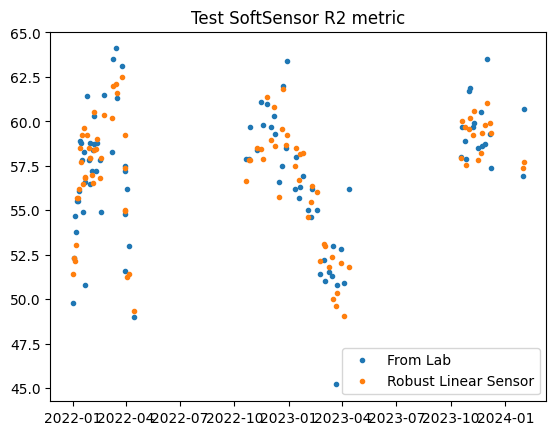

In [72]:

test_visual_1.visualize([sensor])

In [73]:
test_visual = Essentials.Visualizer(x1, y1, timestamp1, [metric], 'Test SoftSensor R2 metric')

                      Coefficient of determination
Robust Linear Sensor                      0.642116


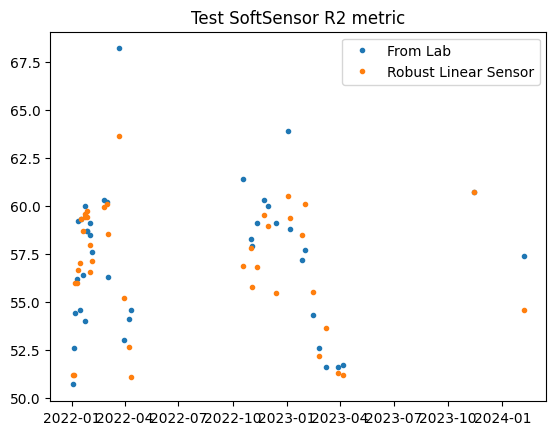

In [74]:
test_visual.visualize([sensor])